In [14]:


# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

In [15]:

# 1) Data upload
df = pd.read_csv("dataDressel.csv")


In [17]:
# sanity check
df.head()


,number,excavation,type,chronology,exterior_diam,inside_diam,rim_h,rim_w,shape_w,rim_inside_h,rim_w_2,protruding_rim,site
0,1,delicias,Dressel B,A,150,120,44,24,11,40,9,40,delicias
1,2,delicias,Dressel B,A,140,102,46,30,7,45,16,39,delicias
2,3,delicias,Dressel B,A,150,110,45,25,11,41,22,36,delicias
3,4,delicias,Dressel E,C,180,90,35,40,14,28,35,9,delicias
4,5,delicias,Dressel B,A,130,86,44,27,12,36,17,32,delicias


In [18]:
# Descriptive Stats
df.describe()

,number,exterior_diam,inside_diam,rim_h,rim_w,shape_w,rim_inside_h,rim_w_2,protruding_rim
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,50.548936,166.889362,94.474468,35.391489,36.293617,9.512766,28.380851,30.348936,18.889362
std,31.830520,12.840189,10.050108,3.583296,4.758895,1.358401,3.564462,5.376006,6.608815
min,1.000000,120.000000,70.000000,25.000000,15.000000,5.000000,18.000000,7.000000,5.000000
25%,24.000000,160.000000,90.000000,34.000000,34.000000,9.000000,26.000000,28.000000,14.000000
50%,47.500000,170.000000,90.000000,35.000000,37.000000,10.000000,28.000000,31.000000,18.000000
75%,74.000000,175.000000,100.000000,37.000000,40.000000,10.000000,30.000000,34.000000,23.000000
max,128.000000,210.000000,140.000000,56.000000,48.000000,14.000000,45.000000,44.000000,42.000000


In [19]:
# Check for nulls
df.isna().sum()

number            0
excavation        0
type              0
chronology        8
exterior_diam     0
inside_diam       0
rim_h             0
rim_w             0
shape_w           0
rim_inside_h      0
rim_w_2           0
protruding_rim    0
site              0
dtype: int64

In [20]:
# data normalization
df.columns = [c.strip().lower().replace("\\", "").replace("/", "_") for c in df.columns]

In [28]:

# Select features and target
features = ["exterior_diam", "rim_h", "rim_w","chronology", "site"]
target = "shape_w"


In [35]:

# Variable that are category (chronology, site)
df["chronology"] = LabelEncoder().fit_transform(df["chronology"].astype(str))
df["site"] = LabelEncoder().fit_transform(df["site"].astype(str))


In [33]:

# Define X e y
X = df[features]
y = df[target]


In [34]:
# remove null values
mask = X["chronology"].notna() & y.notna()
X = X[mask]
y = y[mask]

In [36]:

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:

# Create the Decision Tree model
model = DecisionTreeRegressor(random_state=42, max_depth=3)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

In [38]:

#  MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 1.8376677495870586



Feature Importances:
site             0.475103
exterior_diam    0.184846
rim_w            0.167735
chronology       0.095257
rim_h            0.077060
dtype: float64


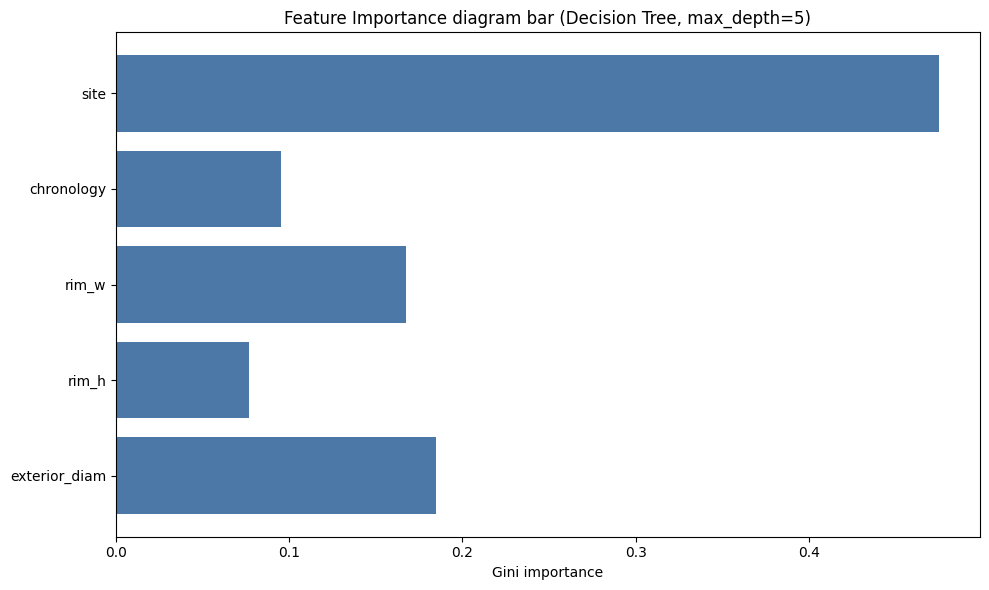

In [39]:

# features importance
importances = pd.Series(model.feature_importances_, index=features)
print("\nFeature Importances:")
print(importances.sort_values(ascending=False))


plt.figure(figsize=(10, 6))
plt.barh(importances.index, importances.values, color='#4C78A8')
plt.title("Feature Importance diagram bar (Decision Tree, max_depth=5)")
plt.xlabel("Gini importance")
plt.tight_layout()
plt.show()



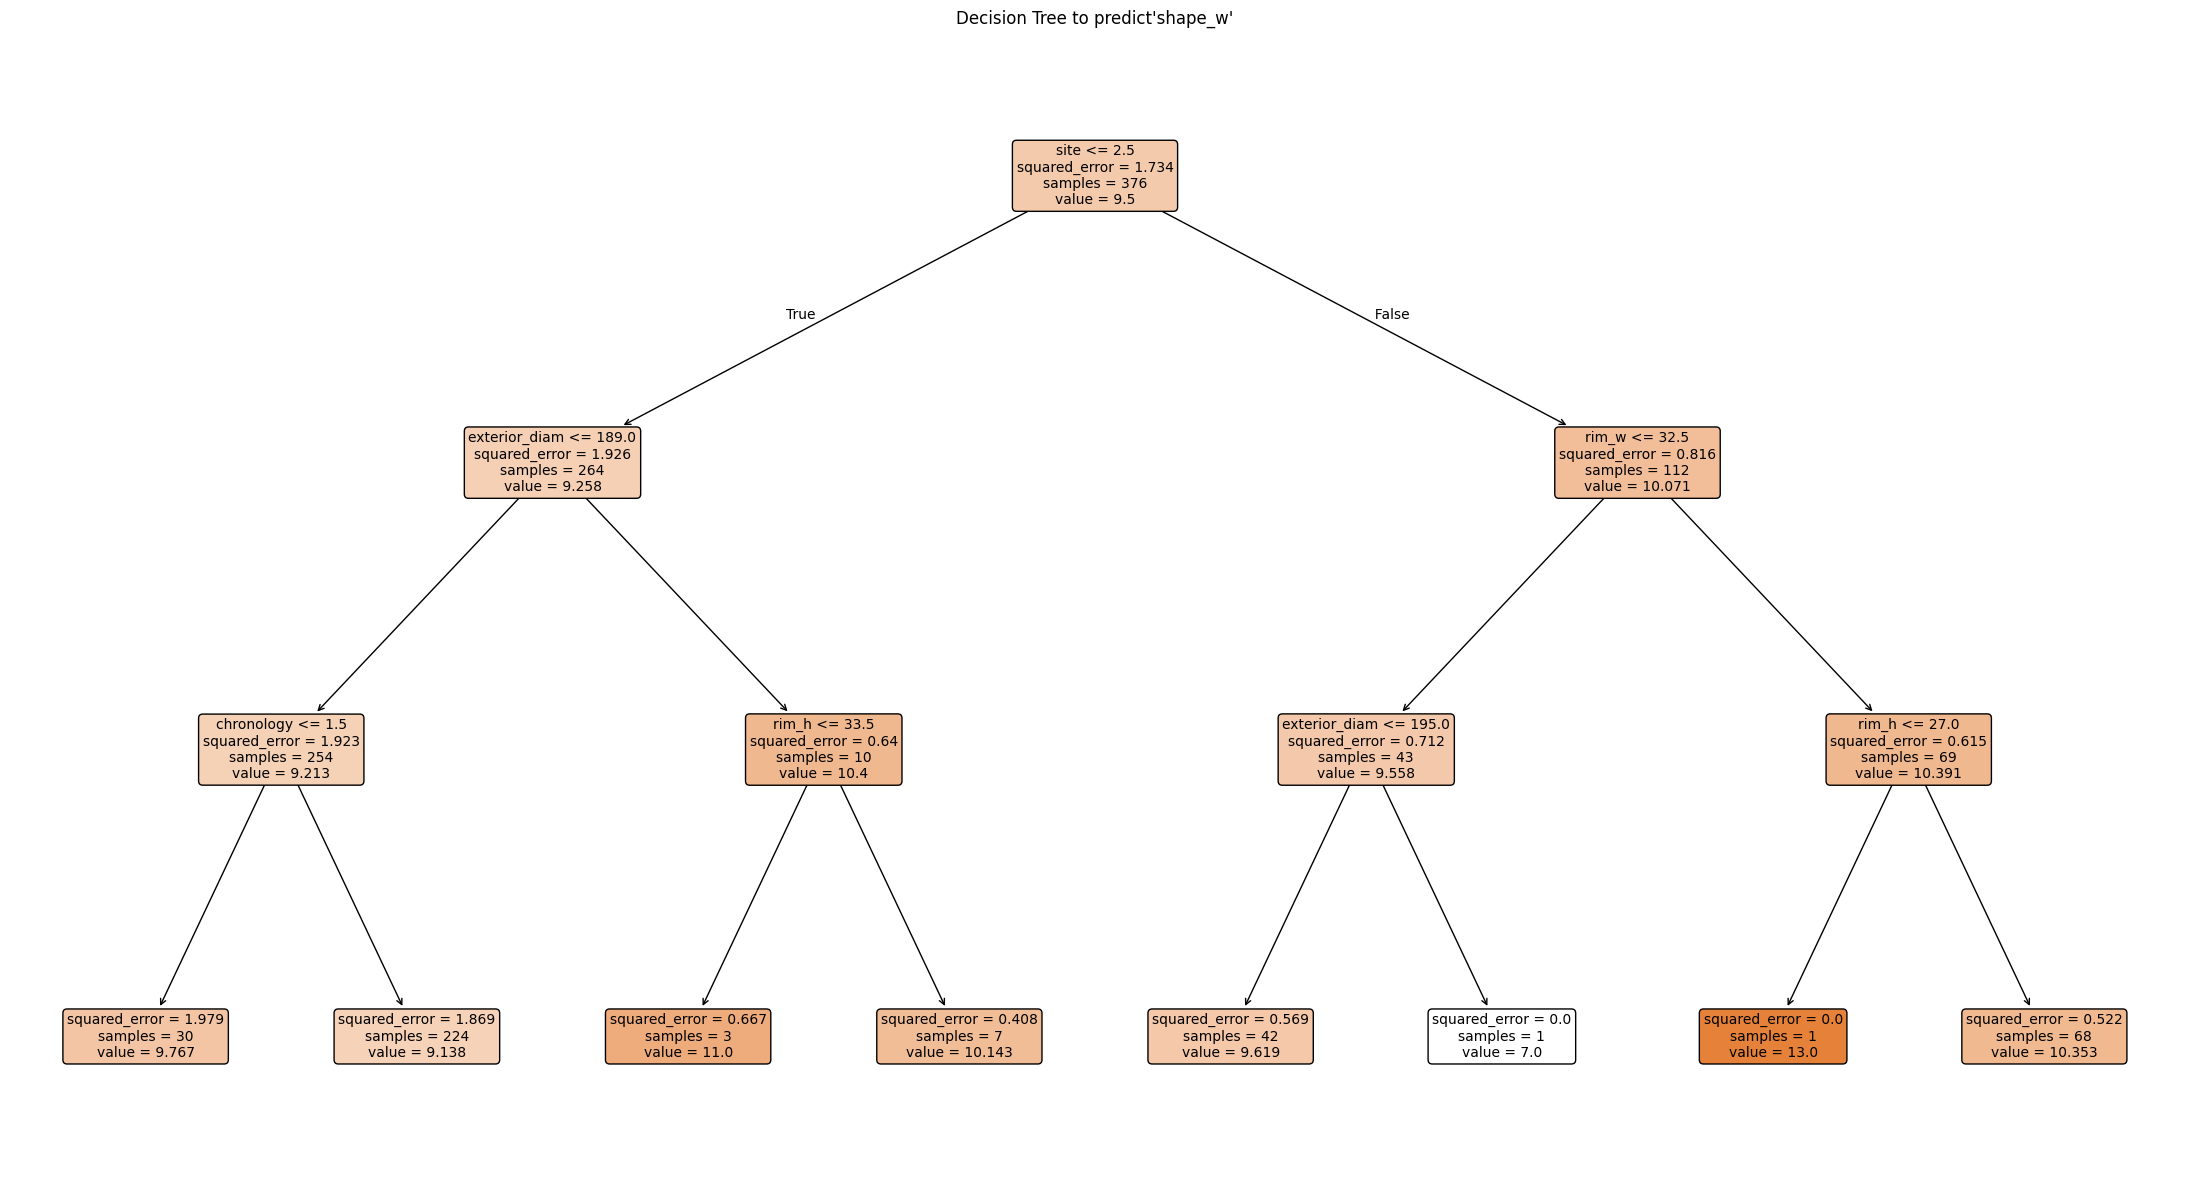

In [40]:

# Decision tree plot
plt.figure(figsize=(22, 12))
plot_tree(
    model,
    feature_names=features,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree to predict'shape_w'")
plt.tight_layout()
plt.show()



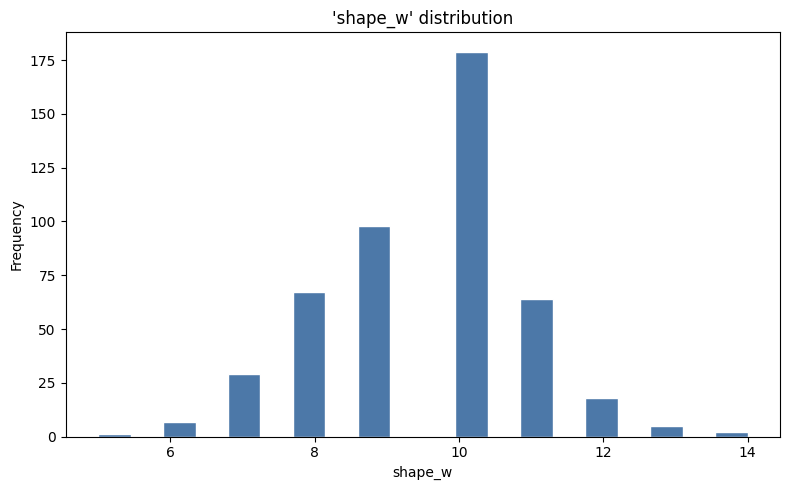

In [41]:

# histogram
plt.figure(figsize=(8,5))
plt.hist(df['shape_w'], bins=20, color='#4C78A8', edgecolor='white')
plt.title("'shape_w' distribution")
plt.xlabel("shape_w"); plt.ylabel("Frequency")
plt.tight_layout(); plt.show()


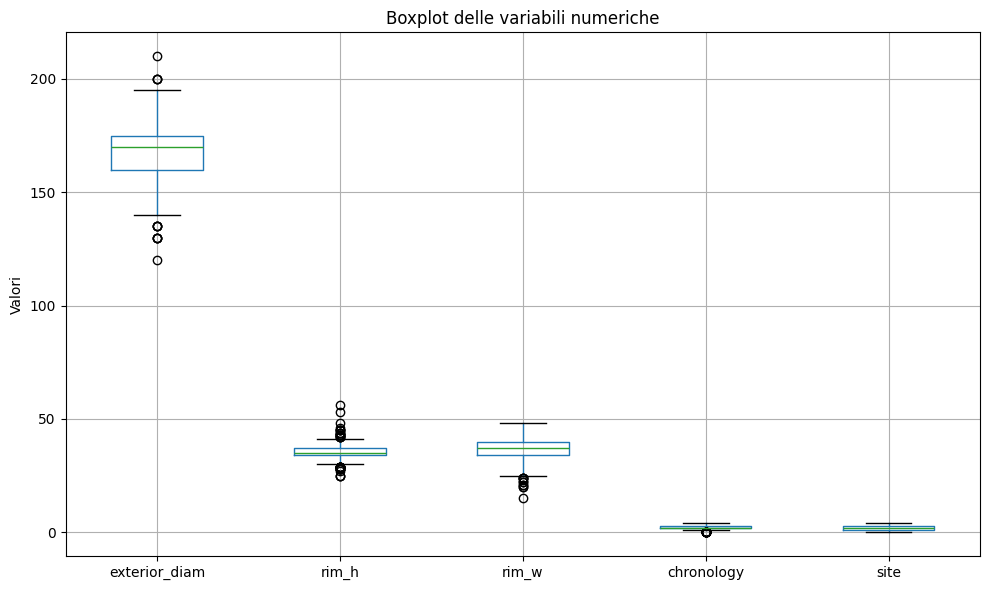

In [42]:

# Boxplot
plt.figure(figsize=(10,6))
df[features].boxplot()
plt.title("Boxplot delle variabili numeriche")
plt.ylabel("Valori")
plt.tight_layout(); plt.show()


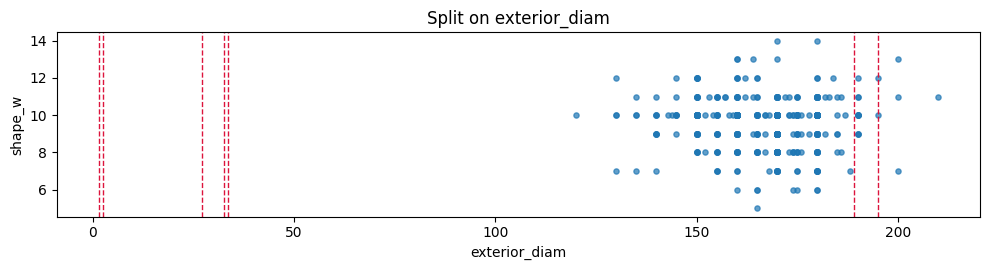

In [43]:
#  Plot 
# ---------------------------------------------------
X = df[["exterior_diam"]].astype(float)         # feature numerica
y = df["shape_w"].astype(str)                   # target come classe

thresholds = []
tree_ = model.tree_
for i in range(tree_.node_count):
    thr = tree_.threshold[i]
    if thr != -2:  # -2 indica foglia
        thresholds.append(thr)
thresholds = sorted(set(round(t, 3) for t in thresholds))
#print(f"Soglie su exterior_diam: {thresholds}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 2.8))
# Distribuzione lungo l’asse X; uso jitter verticale per separare le classi
y_num = y.astype(int) if y.str.isnumeric().all() else pd.factorize(y)[0]
plt.scatter(X["exterior_diam"], y_num[mask], s=14, alpha=0.7)
for thr in thresholds:
    plt.axvline(thr, color="crimson", ls="--", lw=1)
plt.title("Split on exterior_diam")
plt.xlabel("exterior_diam")
plt.ylabel("shape_w")
plt.tight_layout()
plt.show()